# Intelligent Earth: Machine Learning Assignment Submission -- Ufuk Cakir


# Simple MLP Implementation in Julia

In this assignment, I implemented a simple MLP in Julia from scratch. Julia is a high-level, high-performance, dynamic programming language that is well-suited for scientific computing tasks. It is a great choice for this project because of its speed and user-friendly syntax.

## Code Structure

The code is organized as follows:  
The `src/` directory contains the source code, divided into multiple modules to separate different functionalities:  

- **`Activations.jl`**: Implements common activation functions like ReLU and Sigmoid.  
- **`Forward.jl`**: Handles the forward pass of the network.  
- **`Loss.jl`**: Contains the loss function implementations.  
- **`MNISTUtils.jl`**: Includes utility functions for loading the MNIST dataset.  
- **`Train.jl`**: Implements the training loop.  
- **`Utils.jl`**: Contains additional helper functions.  

## Model

The model is a simple Multi-Layer Perceptron (MLP) with a flexible number of layers and units. ReLU is used as the activation function for the hidden layers, and Sigmoid is used in the output layer to obtain probabilities.

## Optimization

The optimization algorithm used in this implementation is Stochastic Gradient Descent (SGD).  

During each training epoch, the training data is shuffled and divided into mini-batches. Gradients are computed for each mini-batch, and the weights are updated accordingly.  

The cross-entropy loss function is used, which is commonly employed for classification tasks. It is defined as:

$$L(y, \hat{y}) = -\frac{1}{N} \sum \left( y \cdot \log(\hat{y}) + (1-y) \cdot \log(1-\hat{y}) \right)$$

where $y$ is the true label and $\hat{y}$ is the predicted label.  

I used the Zygote package for automatic differentiation to compute gradients and update weights.

## Dataset

The MNIST dataset is used in this example, making it a classification task. The dataset contains 28x28 pixel grayscale images of handwritten digits (0-9), split into 60,000 training images and 10,000 test images.

## Results
We train a MLP on the classification task and use the cross-entropy loss function on the MNIST dataset.




In [1]:
push!(LOAD_PATH, "./src")

using MNISTUtils
using Initialization
using Activations
using Forward
using Loss
using Train
using Utils
using Visualizations

X_train, y_train, X_test, y_test = load_mnist()
println(size(X_train))

(28, 28, 60000)


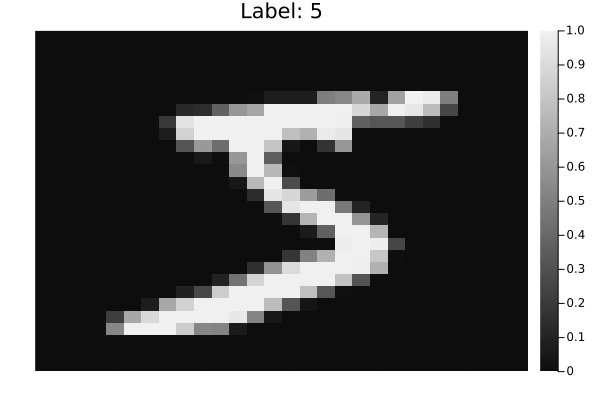

In [2]:
plot_mnist(X_train, y_train,1)

In [ ]:
X_train_shaped, y_train_shaped, X_test_shaped, y_test_shaped = preprocess_data(X_train, y_train, X_test, y_test)

In [4]:
#Define Hyperparameters
layer_dimensions = [784, 128, 64, 10]
epochs = 10
batch_size= 256
learning_rate = 0.01
plot_animation = false
animation_filename = "animation.gif"


params, best_params, train_loss, train_acc, test_acc = train_mlp(
    X_train_shaped, 
    y_train_shaped, 
    X_test_shaped, 
    y_test_shaped, 
    layer_dimensions; 
    epochs=epochs, 
    batch_size=batch_size, 
    lr=learning_rate, 
    plot_animation=plot_animation, 
    animation_filename=animation_filename
)

Number of parameters: 109386
Number of training samples: 60000


Training epoch 1... 100%|██████████████████████████████████████████████████| Time: 0:00:07


Epoch 1 | Last Batch Loss = 0.6494154929590648 | Train Accuracy = [0.8029][end] | Test Accuracy = [0.8011][end]


Training epoch 2... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 2 | Last Batch Loss = 0.528785606910294 | Train Accuracy = [0.8029, 0.86285][end] | Test Accuracy = [0.8011, 0.8653][end]


Training epoch 3... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 3 | Last Batch Loss = 0.3526677477449953 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667][end] | Test Accuracy = [0.8011, 0.8653, 0.8881][end]


Training epoch 4... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 4 | Last Batch Loss = 0.3693147157206759 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991][end]


Training epoch 5... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 5 | Last Batch Loss = 0.32259236338873043 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081][end]


Training epoch 6... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 6 | Last Batch Loss = 0.3262702158546185 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333, 0.9113666666666667][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081, 0.9136][end]


Training epoch 7... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 7 | Last Batch Loss = 0.34551145820360807 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333, 0.9113666666666667, 0.9167][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081, 0.9136, 0.9208][end]


Training epoch 8... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 8 | Last Batch Loss = 0.26281981139593236 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333, 0.9113666666666667, 0.9167, 0.92095][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081, 0.9136, 0.9208, 0.922][end]


Training epoch 9... 100%|██████████████████████████████████████████████████| Time: 0:00:04


Epoch 9 | Last Batch Loss = 0.2900438226856312 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333, 0.9113666666666667, 0.9167, 0.92095, 0.9236333333333333][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081, 0.9136, 0.9208, 0.922, 0.927][end]


Training epoch 10... 100%|██████████████████████████████████████████████████| Time: 0:00:03


Epoch 10 | Last Batch Loss = 0.15720830605273337 | Train Accuracy = [0.8029, 0.86285, 0.8846166666666667, 0.8974, 0.9053833333333333, 0.9113666666666667, 0.9167, 0.92095, 0.9236333333333333, 0.9271666666666667][end] | Test Accuracy = [0.8011, 0.8653, 0.8881, 0.8991, 0.9081, 0.9136, 0.9208, 0.922, 0.927, 0.928][end]
Final Train Accuracy = 0.9271666666666667
Final Test  Accuracy = 0.928
Best Test Accuracy = 0.928


(Dict{String, Array{Float64}}("W2" => [-0.05075140770059781 -0.009071435271015203 … 0.02477245174051023 0.057656219270589885; 0.0620235881420602 -0.13656079591246245 … -0.11501518165520597 -0.18763039559001046; … ; 0.10805264641880959 -0.004198094444703093 … 0.14600703619356956 -0.023946054636049777; 0.19590245020058683 0.07443071137460765 … 0.0274596728119943 -0.04335774200960848], "W3" => [-0.03125875036985355 0.060040741398638076 … -0.13809050052639354 -0.0770830261195759; -0.224737427624438 0.05984228051069949 … 0.15801913329153222 0.06894890132200887; … ; 0.03704119967469802 0.34817159937476044 … -0.008413338478566982 0.10266748036994104; -0.14566082222802038 -0.2827698866100637 … -0.17349738491243807 0.12795149975279207], "W4" => [-0.08828850026771691 0.24843285491656772 … 0.2587026726971585 -0.1057801451479084; -0.0002819452582693879 -0.046079536417743816 … 0.44518843890115806 0.180878510336119; … ; 0.4554984384495797 -0.11383125065216793 … -0.18246282480375398 -0.55792668555763

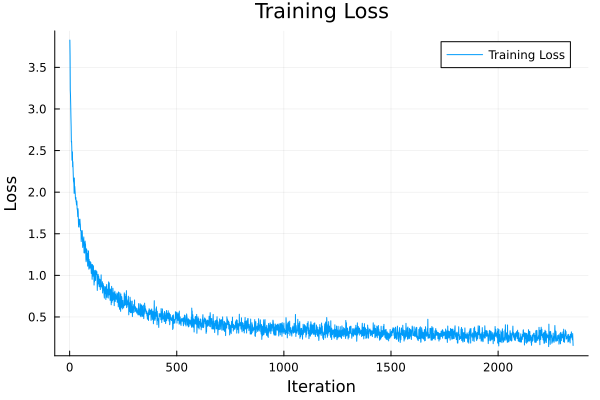

In [7]:
# Plot the training loss
using Plots

plot(train_loss, label="Training Loss", xlabel="Iteration", ylabel="Loss", title="Training Loss")

As we can see from the plot, the loss decreases over time, indicating that the model is learning.

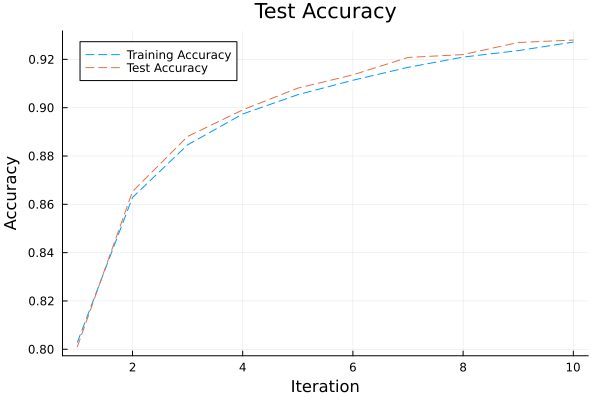

In [13]:
plot(train_acc, label="Training Accuracy", style =:dash,xlabel="Iteration", ylabel="Accuracy", title="Training Accuracy")
plot!(test_acc, label="Test Accuracy",style=:dash, xlabel="Iteration", ylabel="Accuracy", title="Test Accuracy")

As the accuracy plot shows, the model's performance improves over time, which means the model is learning to classify the digits correctly. The model achieves an accuracy of around 92% on the test set after training.

Show some Examples and the prediction of the model

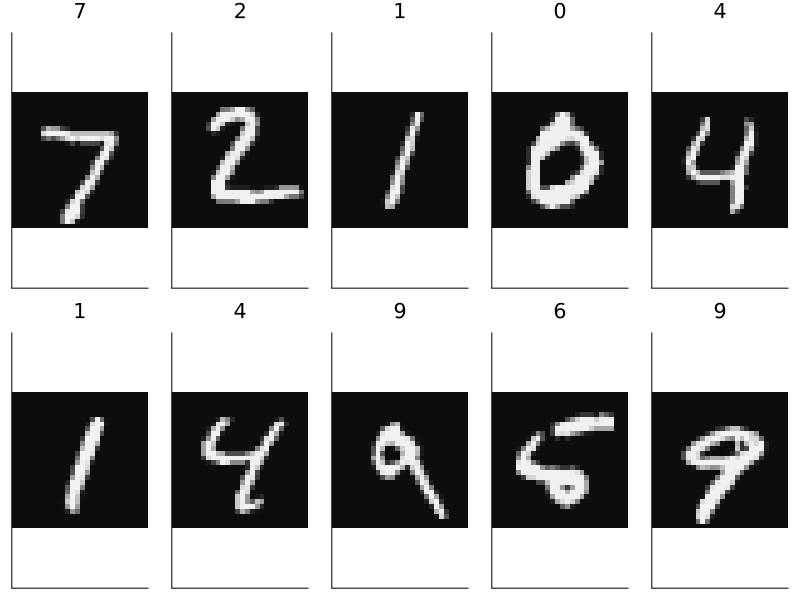

In [40]:
function predict(params, X)
    Y_hat = forward(X, params)
    Y_hat_labels = [i[1] for i in argmax(Y_hat, dims=1)] .- 1
    return Y_hat_labels
end


Y_predicted = predict(params, X_test_shaped)

p = plot(layout=(2, 5), size=(800, 600)) # Adjust size for better visualization
for i in 1:10
    image = transpose(X_test[:, :, i]) # Transpose the image
    image = reverse(image, dims=1)      # Reverse along rows
    true_label = argmax(y_test[i]) - 1 # Get true label from one-hot encoding
    heatmap!(p, image, aspect_ratio=:equal, c=:grays,
             title="$(Y_predicted[i])", subplot=i,xticks=false, yticks=false,colorbar=false)
end
display(p)
